In [17]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf
import time
import yfinance as yf

import os
from os import listdir
from os.path import isfile, join

import statsmodels.api as sm
import seaborn as sns

In [18]:
#default Values
path = "D:\\Personal\\Quantitative-Finance\\stocks\\"
S_year = 2020
S_month = 1
S_day = 1
S_date_str = f"{S_year}-{S_month}-{S_day}"
S_date_datetime = dt.datetime(S_year,S_month,S_day)

E_year = 2024
E_month = 5
E_day = 31
E_date_str = f"{E_year}-{E_month}-{E_day}"
E_date_datetime = dt.datetime(E_year,E_month,E_day)


In [19]:
# # get stock file names in a list
files = [x for x in listdir(path) if isfile(join(path,x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers.sort()
# # create dataframe from our list
# stock_df = pd.DataFrame(tickers,columns=["tickers"])

# return dataframe from csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(path+ticker+".csv",index_col='Date',parse_dates=True)
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        return df
    

# Save dataframe to csv
def save_dataframe_to_csv(df,ticker):
    df.to_csv(path+ticker+".csv")

# return on investment over time
def get_roi(df):
    df['Date'] = pd.to_datetime(df['Date'])
    start_val = df[df['Date'] == S_date_str]['Adj Close'][0]
    end_val = df[df['Date'] == E_date_str]['Adj Close'][0]
    print("Initial Price:",start_val)
    print("Final Price:",end_val)
    roi = (end_val - start_val) / start_val
    return roi

# get coefficient of variance
def get_cov(stock_df):
    for stock in stock_df:
        mean,sd = stock_df['Adj Close'].mean(),stock_df['Adj Close'].std()
        cov = sd / mean
        return cov
    

# Merge Multiple stock in on df
def merge_df_by_column_name(col_name,*tickers):
    
    mult_df = pd.DataFrame()
    start = S_date_datetime
    end = E_date_datetime
    
    for x in tickers:
        mult_df[x] = get_df_from_csv(x)[col_name]
    return mult_df

def get_valid_dates(df, sdate, edate):  
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending
    
def roi_between_dates(df, sdate, edate):
    try: 
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi
    
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        # df['Date'] = pd.to_datetime(df['Date'])
        # Use a mask to grab data between defined dates
        # mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

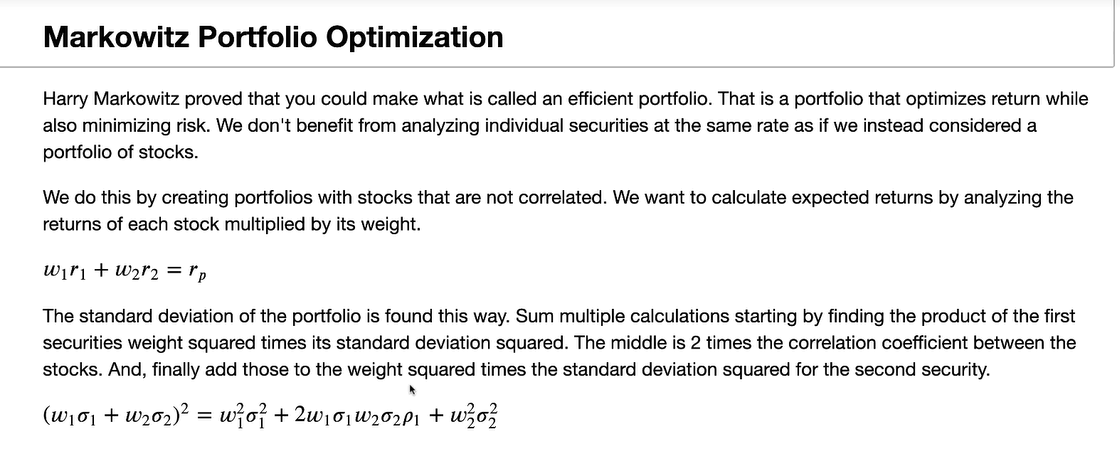

In [20]:
port_list = ["GNRC",'DXCM','AMD','NFLX','COST','TGT','AES','MSCI','NEM','SBAC','HES']

In [21]:
mult_df = merge_df_by_column_name('Adj Close',S_date_datetime,E_date_datetime, *port_list)

In [22]:
mult_df

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,SBAC,HES
Date,,,,,,,,,,,
2020-01-02,102.010002,54.845001,49.099998,329.809998,268.626007,114.780769,17.447664,255.256210,37.279510,227.889359,63.333431
2020-01-03,101.669998,54.674999,48.599998,325.899994,268.847168,113.588074,17.247314,250.171204,36.943111,229.950089,65.316109
2020-01-06,101.250000,56.497501,48.389999,335.829987,268.920837,112.513733,17.447664,251.418472,37.314011,230.159958,66.270050
2020-01-07,102.900002,57.862499,48.250000,330.750000,268.497040,112.714043,17.508640,251.763901,37.288128,226.534637,66.344864
2020-01-08,100.029999,58.307499,47.830002,339.260010,271.574982,112.349854,17.473797,255.745529,36.296196,228.996048,64.081612
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,148.660004,127.370003,166.360001,646.750000,809.729980,145.229996,20.910000,493.000000,41.729462,188.089996,150.928726
2024-05-28,151.259995,127.379997,171.610001,649.000000,813.169983,147.100006,21.129999,495.700012,42.146957,187.289993,151.586716
2024-05-29,149.490005,127.639999,165.139999,654.619995,806.520020,147.740005,21.070000,489.739990,41.391491,186.380005,148.426376


<Axes: xlabel='Date'>

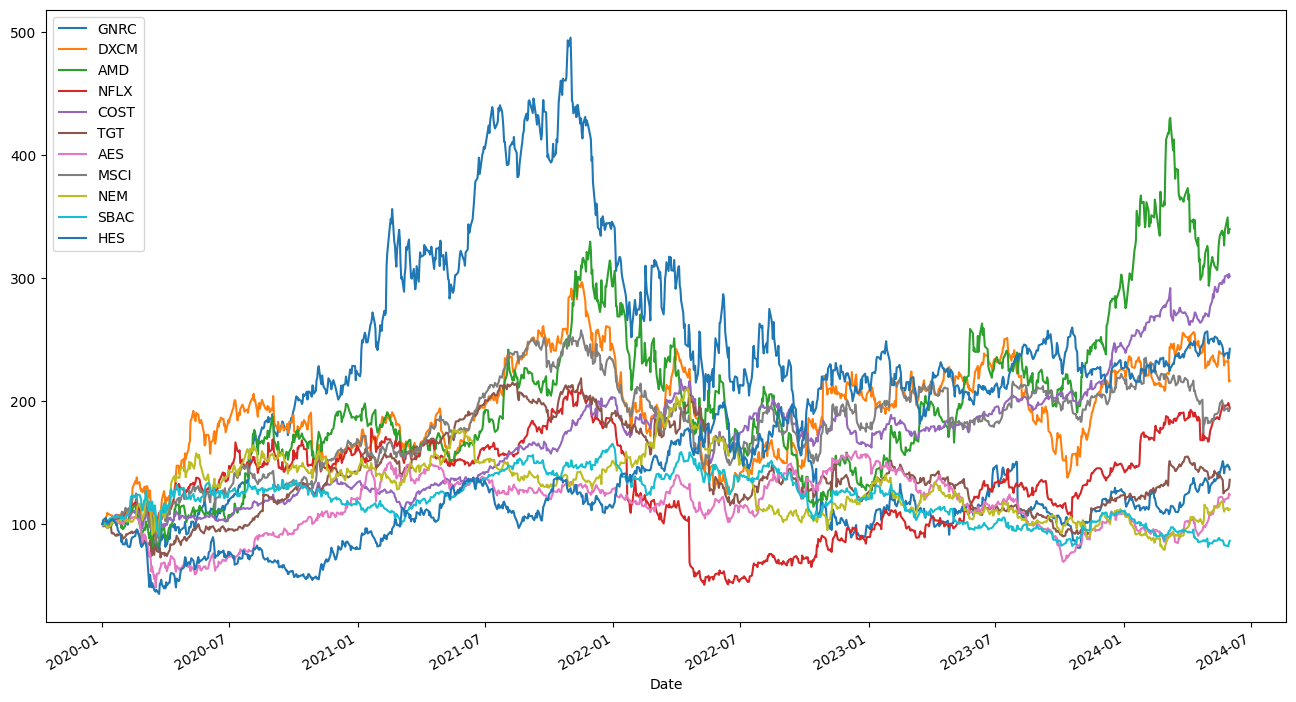

In [23]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16,9))

In [24]:
mult_df.iloc[0]

GNRC    102.010002
DXCM     54.845001
AMD      49.099998
NFLX    329.809998
COST    268.626007
TGT     114.780769
AES      17.447664
MSCI    255.256210
NEM      37.279510
SBAC    227.889359
HES      63.333431
Name: 2020-01-02 00:00:00, dtype: float64